# SARSA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gridworld
import random
import time

In [2]:
#Create an epsilon greedy policy 
def epsilon_greedy(epsilon,Q_values,s):
    if (np.random.rand() > epsilon):
        action = np.argmax(Q_values[s, :])       
    else:
        action = np.random.choice([0,1])
    return action

In [3]:
#SARSA algorithm
def SARSA(epsilon, n_states, n_actions, eta, gamma, Q_values, trials):
    duration_trials = []
    for trial in range(trials):
        total_reward = 0
        s = np.random.randint(0, n_states)
        a = epsilon_greedy(epsilon, Q_values, s)
        t = 0
        done = False

        while done == False:                    

            if s == 0:
                r = 1000 #good result for the bottom-most state
                total_reward += r
                done = True
            elif s==49:
                r = 100 # bad result for the top-most state
                total_reward += r
                done = True
            else:
                r = -10

            if a ==0:
                s_ = s-1
            else:
                s_= s+1
            a_ = epsilon_greedy(epsilon, Q_values, s)

            if done==True:
                Q_values[s,a] += eta*(r - Q_values[s, a]) #TD is zero
            else:
                Q_values[s,a] += eta*(r + (gamma * Q_values[s_,a_]) - Q_values[s,a]) #update the Q values
            s, a = s_, a_
            t += 1
            total_reward += r
        duration_trials.append(t) #count the duration of trials
    return duration_trials, Q_values

In [4]:
#Plot the graphs with given parameters
epsilon = 0.1
n_states = 50
n_actions = 2
eta = 0.1
gamma = 1
Q_init = np.zeros((n_states, n_actions))
trials = 50000

duration_trials, Q_values = SARSA(epsilon, n_states, n_actions, eta, gamma, Q_init, trials)

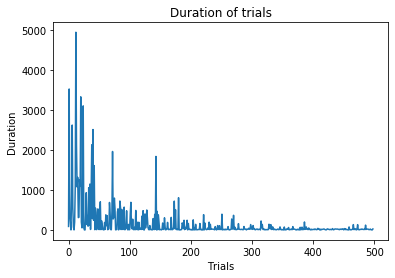

In [5]:
plt.plot(duration_trials[0:499]);
plt.title('Duration of trials');
plt.ylabel('Duration');
plt.xlabel('Trials');

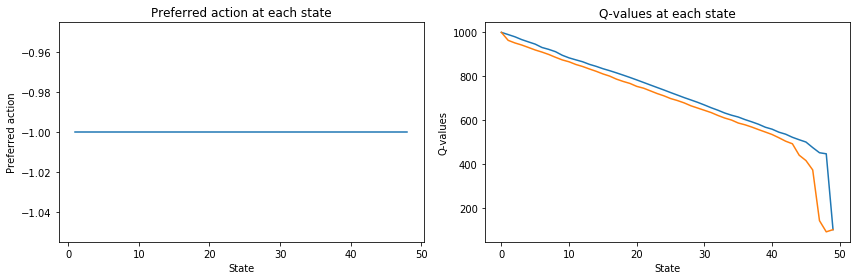

In [6]:
fig = plt.subplots(1,2, figsize=(12,4))
R = np.where(Q_values[1:-1,0]>=Q_values[1:-1,1],-1,1)
plt.subplot(1,2,1)
plt.plot(range(1,49),R);
plt.title('Preferred action at each state');
plt.ylabel('Preferred action');
plt.xlabel('State');
#As expected, when gamma is 1, the agent always prefers to go to the bottom-most state

plt.subplot(1,2,2)
plt.plot(Q_values);
plt.title('Q-values at each state');
plt.ylabel('Q-values');
plt.xlabel('State');
plt.tight_layout();

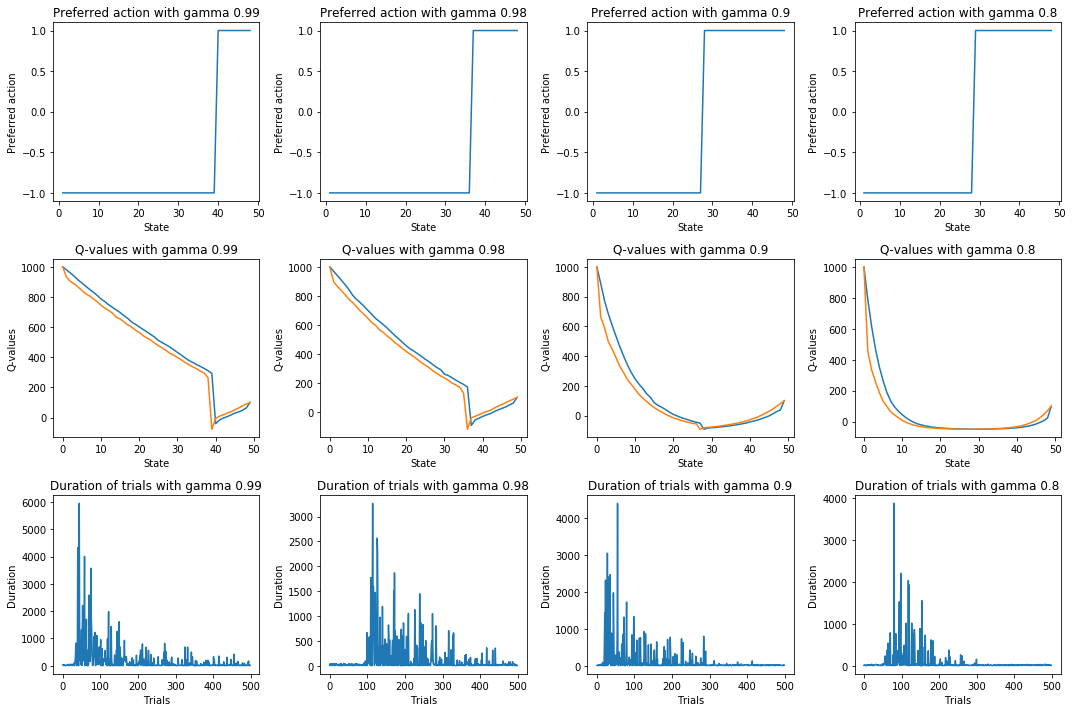

In [7]:
#Create the same plots with different discount factors
gammas = [0.99, 0.98, 0.9, 0.8]

fig = plt.subplots(3,4,figsize=(15,10))

for ind, i in enumerate(gammas):
    duration_trials, Q_gamma = SARSA(epsilon, n_states, n_actions, eta, i, Q_init, trials)
    R = np.where(Q_gamma[1:-1,0]>=Q_gamma[1:-1,1],-1,1)
    plt.subplot(3,4,ind+1);
    plt.title('Preferred action with gamma ' + str(i));
    plt.ylabel('Preferred action');
    plt.xlabel('State');
    plt.plot(range(1,49),R);
    plt.subplot(3,4,ind+5);
    plt.plot(Q_gamma);
    plt.title('Q-values with gamma ' + str(i));
    plt.ylabel('Q-values');
    plt.xlabel('State');
    plt.subplot(3,4,ind+9);
    plt.plot(duration_trials[0:499]);
    plt.title('Duration of trials with gamma ' + str(i));
    plt.ylabel('Duration');
    plt.xlabel('Trials');
    plt.tight_layout();